# candide feature dissection

In [1]:
import sys

In [2]:
def load_modules():
    sys.path.append("../../../")
    %run ../../../ac/images/loader.py
    %run ../../../ac/math/angles.py
    %run ../../../ac/visualizer/plotter.py
    %run ../../../al/feature/face/imps/candide.py

In [3]:
load_modules()

# resources

In [4]:
candide_path="/home/chy/archive-model/candide/candide.npz"
land_mark_path="/home/chy/archive-model/candide/shape_predictor_68_face_landmarks.dat"

In [5]:
np.set_printoptions(suppress=True)

In [6]:
candide = Candide(candide_path, land_mark_path)

# candide feature visualize (기억 보존)

<br>

## + 땅 / 좌 / 시계
### - params[1]: pitch (-하늘봄 / +땅봄)
### - params[2]: yaw   (-오른쪽 / +왼쪽)
### - params[3]: roll  (-ccw / +cw)

<br>


In [7]:
def to_unity_head_pose(pitch, yaw):
    u_pitch = pitch if pitch >= 0 else pitch + 360
    u_yaw = (-1 * yaw) + 180
    return u_pitch, u_yaw

def report(img_path):
    img = cv2.imread(img_path)
    p, y, r = candide.get_head_pose(img)
    up, uy = to_unity_head_pose(p, y)
    print("pitch, yaw, roll ({:0.4f}, {:0.4f}, {:0.4f})".format(p, y, r))
    print("unity ({:0.4f}, {:0.4f})".format(up, uy))
    # print("params[4:6] {}".format(ps[4:6]))
    
    ax = show_image(img)
    h, w = img.shape[0], img.shape[1]
    # draw_point(ax, w-ps[4], h-ps[5])  # param 4,5 는 무엇일까?

pitch, yaw, roll (-50.0299, 1.3216, -2.0337)
unity (309.9701, 178.6784)


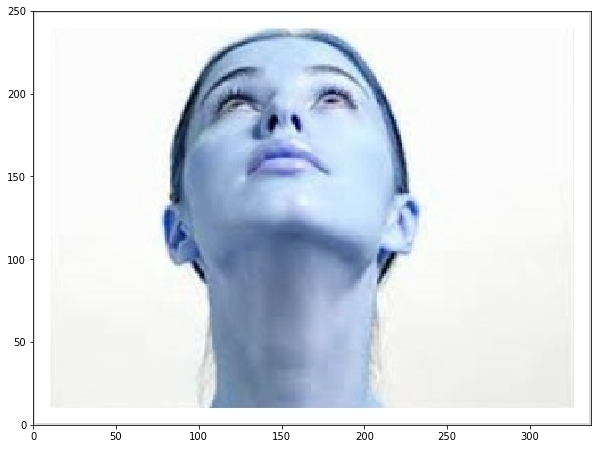

In [8]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/pitchup.jpg")

pitch, yaw, roll (32.6582, -4.2106, -1.2480)
unity (32.6582, 184.2106)


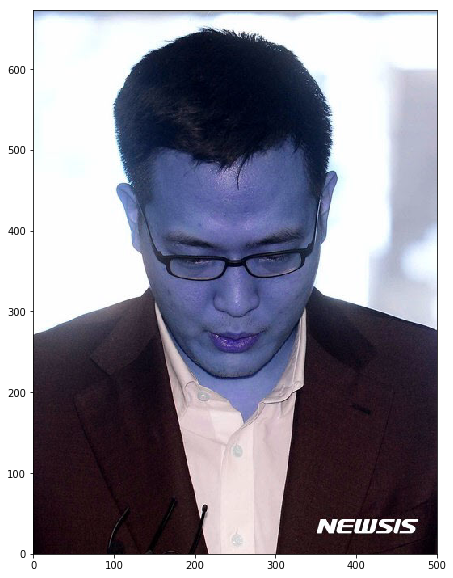

In [9]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/pitchdown.jpg")

pitch, yaw, roll (4.5873, 32.5619, 0.3615)
unity (4.5873, 147.4381)


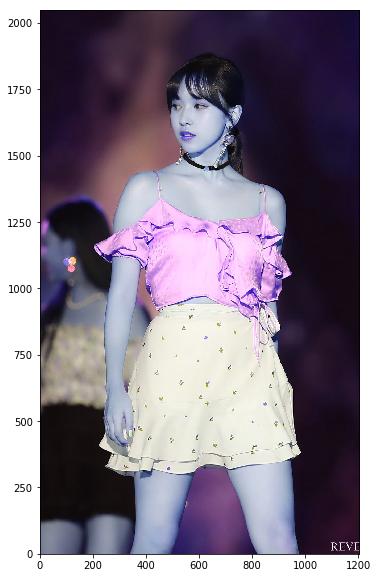

In [10]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/yawleft.jpg")

pitch, yaw, roll (10.1098, -40.9754, -6.9526)
unity (10.1098, 220.9754)


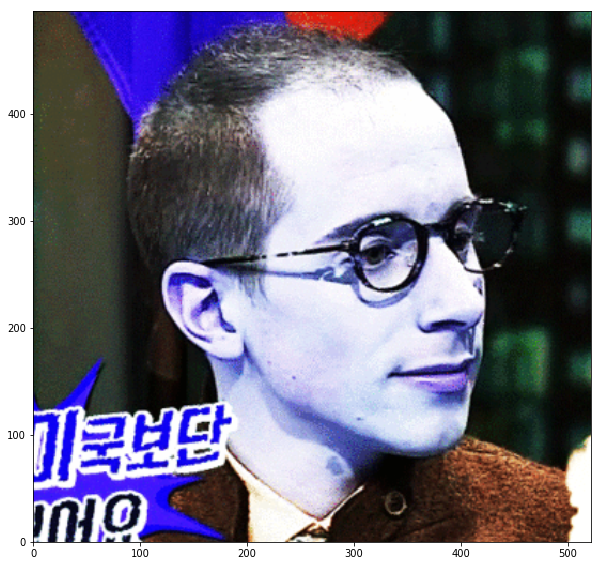

In [11]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/yawright.png")

pitch, yaw, roll (8.7329, 11.6037, 33.3519)
unity (8.7329, 168.3963)


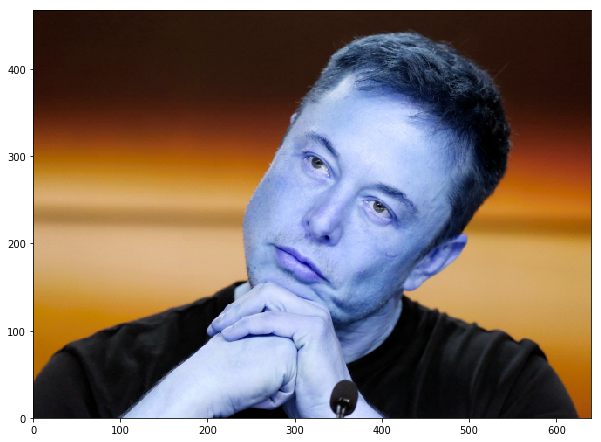

In [12]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/rollcw.jpg")

pitch, yaw, roll (-14.3676, 14.0989, -29.5419)
unity (345.6324, 165.9011)


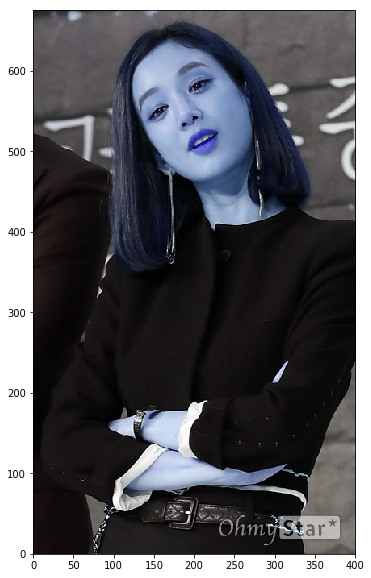

In [13]:
report("/media/chy/1326657F605F16F2/bench/vc-one/headpose/rollccw.jpg")